In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sub_ids = ['22201','22202','22203','22204','22205','22206']


long_path = 'E:\\Admin\\Research\\Eye Decide\\Longform\\'
short_path = 'E:\\Admin\\Research\\Eye Decide\\Shortform\\'

frames = []

for sub in sub_ids:
    df = pd.read_csv(long_path+sub+'_baselined_ifix.csv')
    df['Participant'] = str(sub)
    frames.append(df)

In [13]:
data = pd.concat(frames)
del data['Unnamed: 0']

In [10]:
data['CondType'].unique()

array(['No Report', 'S-Time', 'W-Time', 'I-Time', 'M-Time'], dtype=object)

In [8]:
data['Time'].unique()

In [14]:
data.loc[data['CondType'].str.match('No Report'),'Participant'].str.match('22201')

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
364970    False
364971    False
364972    False
364973    False
364974    False
364975    False
364976    False
364977    False
364978    False
364979    False
364980    False
364981    False
364982    False
364983    False
364984    False
364985    False
364986    False
364987    False
364988    False
364989    False
364990    False
364991    False
364992    False
364993    False
364994    False
364995    False
364996    False
364997    False
364998    False
364999    False
Name: Participant, Lengt

In [4]:
# Segmenting by subject to grand-average

for participant in sub_ids:
    
    for condition in data['CondType'].unique:
    
        for i in data['Time'].unique:
            data_temp = data[data[data['Participant'].str.match(participant)]]

(2370000, 5)

In [6]:
data[data['CondType'].str.match('I-Time')].head()

,CondType,Time,Pupil,Participant
7500,I-Time,-2.500,-31.616,22201
7501,I-Time,-2.498,-31.616,22201
7502,I-Time,-2.496,-31.616,22201
7503,I-Time,-2.494,-30.616,22201
7504,I-Time,-2.492,-29.616,22201


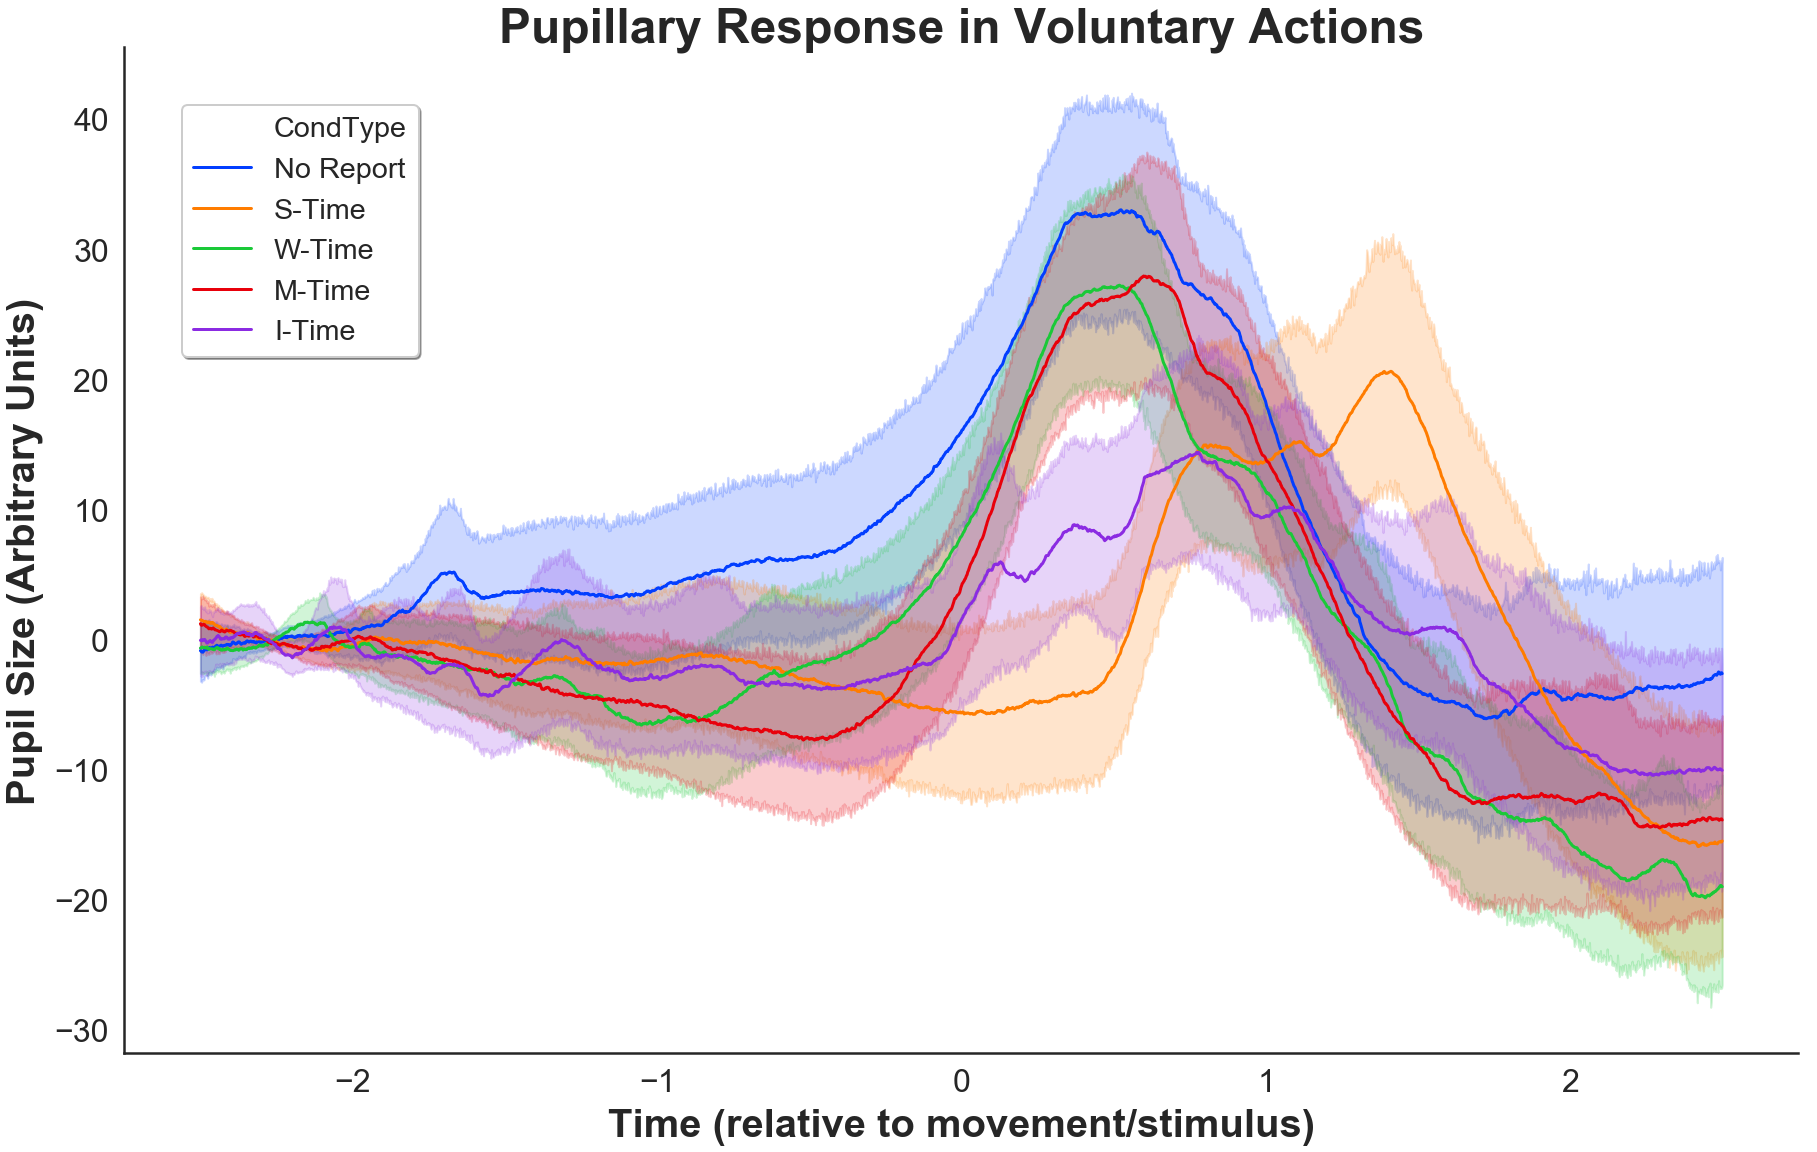

In [9]:
figs,ax=plt.subplots(figsize=(30,18.5))
sns.lineplot(x='Time',y='Pupil',hue='CondType',hue_order=['No Report','S-Time','W-Time','M-Time','I-Time'],data=data,palette='bright',legend='brief',ax=ax)
sns.set(font_scale = 4)
sns.set_context("poster")
sns.set_style("white")
sns.despine()
ax.tick_params(labelsize=32)
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement/stimulus)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_title('Pupillary Response in Voluntary Actions',fontsize=48,fontweight='bold',loc='center')
ax.legend(loc='upper left',shadow=True,borderaxespad=2,fontsize='large',markerscale=2)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})

plt.savefig('MainFigure_ifixed3.png',bbox_inches='tight')


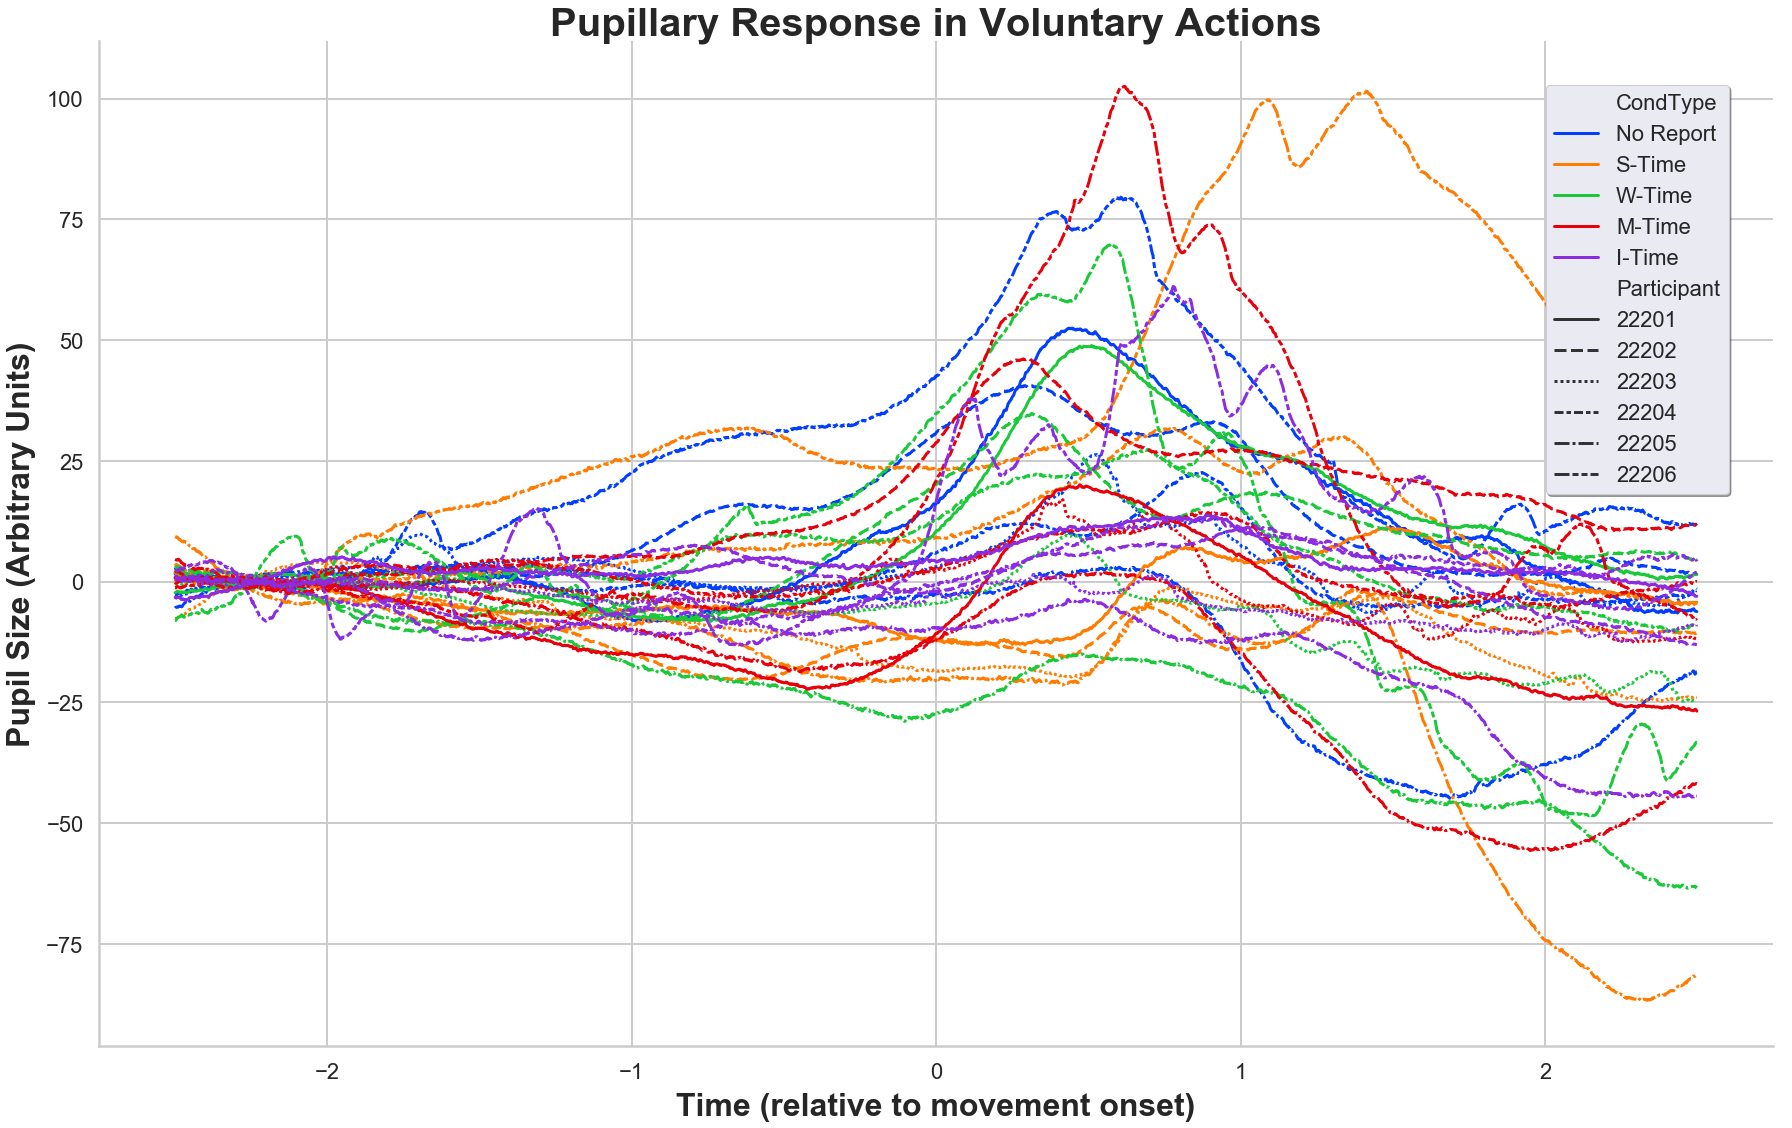

In [27]:
figs,ax=plt.subplots(figsize=(30,18.5))
sns.lineplot(x='Time',y='Pupil',hue='CondType',hue_order=['No Report','S-Time','W-Time','M-Time','I-Time'],style='Participant',data=data,palette='bright',ci=None,ax=ax)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
sns.despine()
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=32,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement onset)',fontsize=32,fontweight='bold',labelpad=10)
ax.set_title('Pupillary Response in Voluntary Actions',fontsize=40,fontweight='bold',loc='center')
ax.legend(loc='upper right',shadow=True,borderaxespad=2)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})
sns.set_context("talk")
plt.savefig('Participants_ifixed.png',bbox_inches='tight')

In [19]:
mask = data['CondType'].str.match('No Report') | data['CondType'].str.match('S-Time')

In [18]:
data[mask].shape

(937500, 4)

AttributeError: 'AxesSubplot' object has no attribute 'xlim'

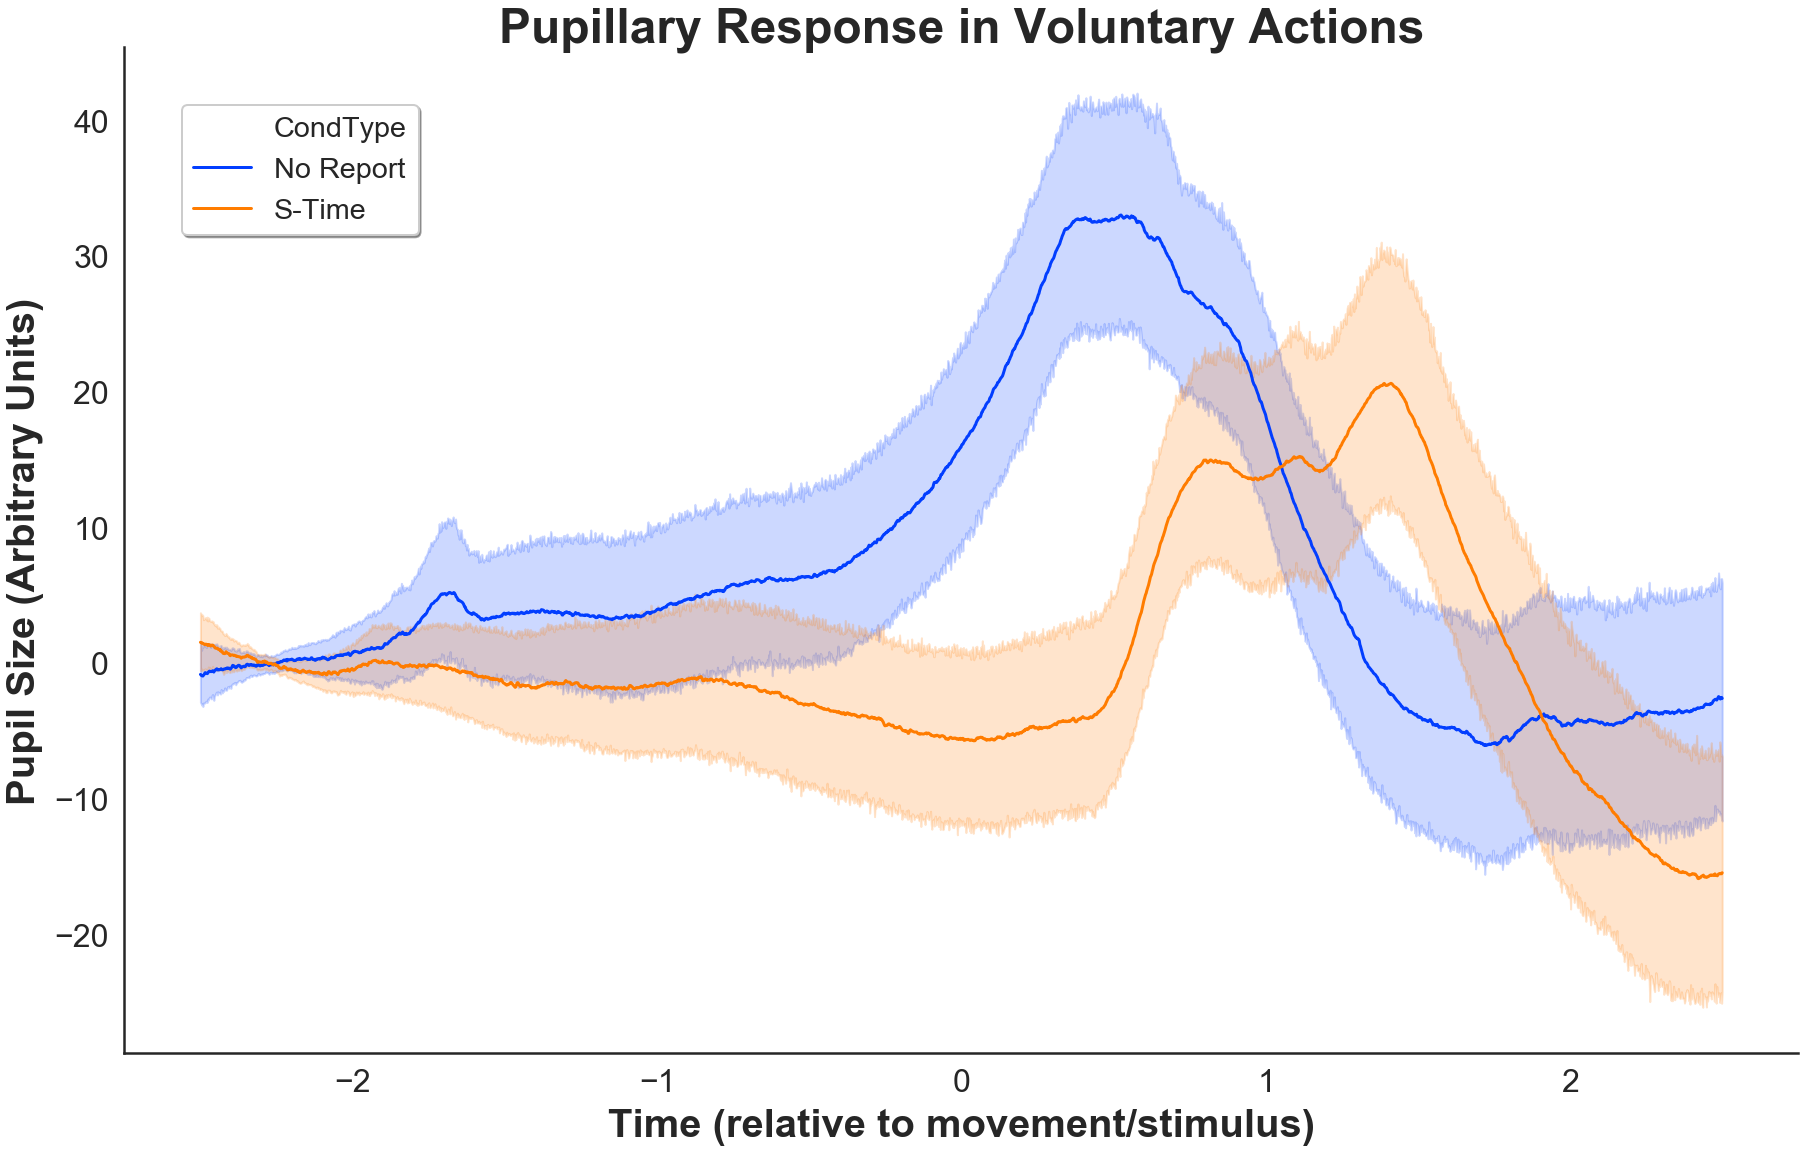

In [22]:
figs,ax=plt.subplots(figsize=(30,18.5))
sns.lineplot(x='Time',y='Pupil',hue='CondType',hue_order=['No Report','S-Time'],data=data[mask],palette='bright',legend=False,ax=ax)
sns.set(font_scale = 4)
sns.set_context("poster")
sns.set_style("white")
sns.despine()
ax.tick_params(labelsize=32)
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement/stimulus)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_title('Pupillary Response in Voluntary Actions',fontsize=48,fontweight='bold',loc='center')
ax.legend(loc='upper left',shadow=True,borderaxespad=2,fontsize='large',markerscale=2)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})
ax.xlim(-1.75,2.5)

plt.savefig('MainFigure_NSFcomp2.png',bbox_inches='tight')


In [43]:
d=data[mask].replace({'No Report':'Action','S-Time':'Tone'})
d.rename({'CondType':'Condition'},axis=1,inplace=True)

In [44]:
d.head()

,Condition,Time,Pupil,Participant
0,Action,-2.500,8.436,22201
1,Action,-2.498,8.436,22201
2,Action,-2.496,7.436,22201
3,Action,-2.494,6.436,22201
4,Action,-2.492,6.436,22201


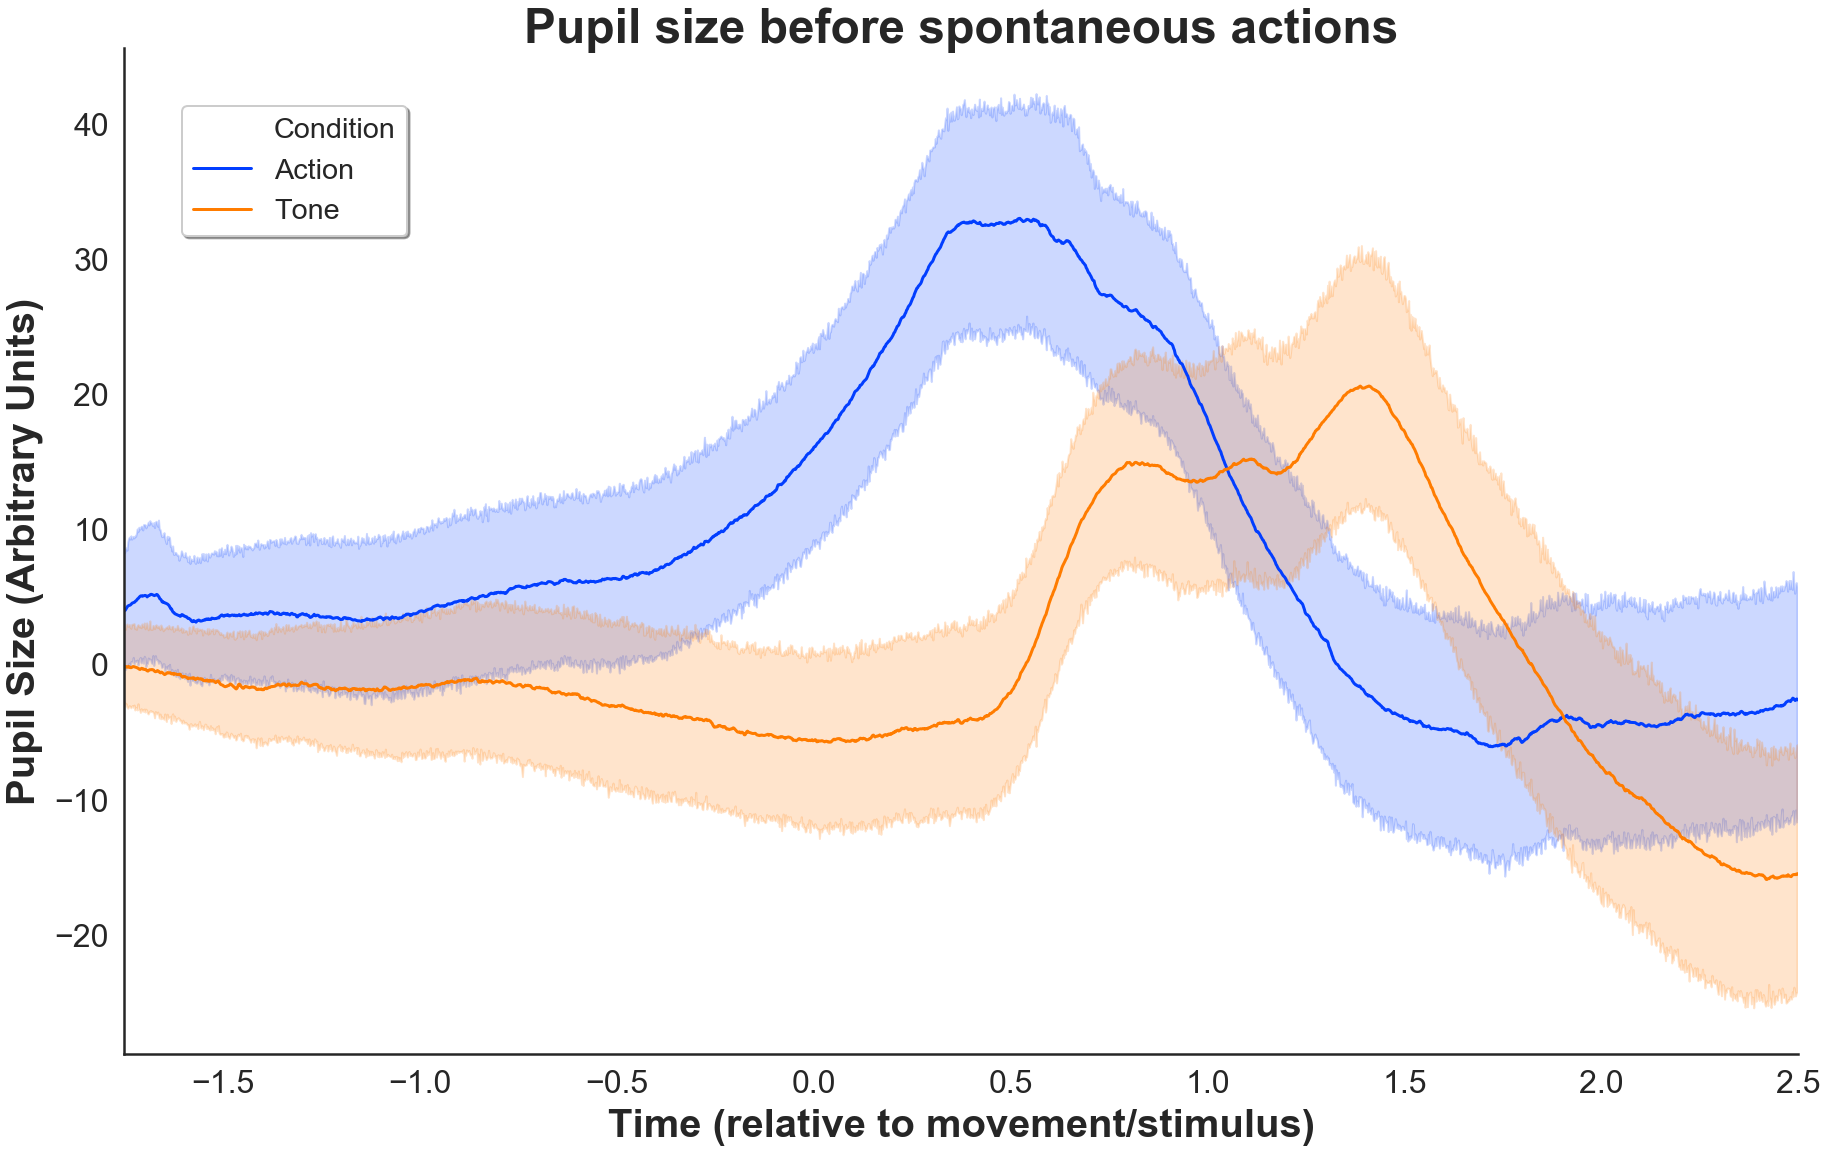

In [48]:
figs,ax=plt.subplots(figsize=(30,18.5))
sns.lineplot(x='Time',y='Pupil',hue='Condition',hue_order=['Action','Tone'],data=d,palette='bright',legend='brief',ax=ax)
sns.set(font_scale = 4)
sns.set_context("poster")
sns.set_style("white")
sns.despine()
ax.tick_params(labelsize=32)
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement/stimulus)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_title('Pupil size before spontaneous actions',fontsize=48,fontweight='bold',loc='center')
ax.legend(loc='upper left',shadow=True,borderaxespad=2,fontsize='large',markerscale=2)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})
ax.set_xlim(-1.75,2.5)

plt.savefig('MainFigure_NSFcomp4.png',bbox_inches='tight')

In [11]:
long_no_report.keys()

Index(['CondType', 'Time', 'Pupil', 'Early'], dtype='object')

In [14]:
nr_frames = []
for i in range(6):
    long_no_report = pd.read_csv(long_path+sub_ids[i]+'_baselined_ifix.csv',index_col=0)
    long_no_report = long_no_report[long_no_report['CondType'].str.match('No Report')]
    long_no_report['Early']='Early'
    long_no_report.iloc[int(long_no_report.shape[0]/2):,3]='Late'
    nr_frames.append(long_no_report)
nr_frames = pd.concat(nr_frames)

In [14]:
nr_frames.head()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


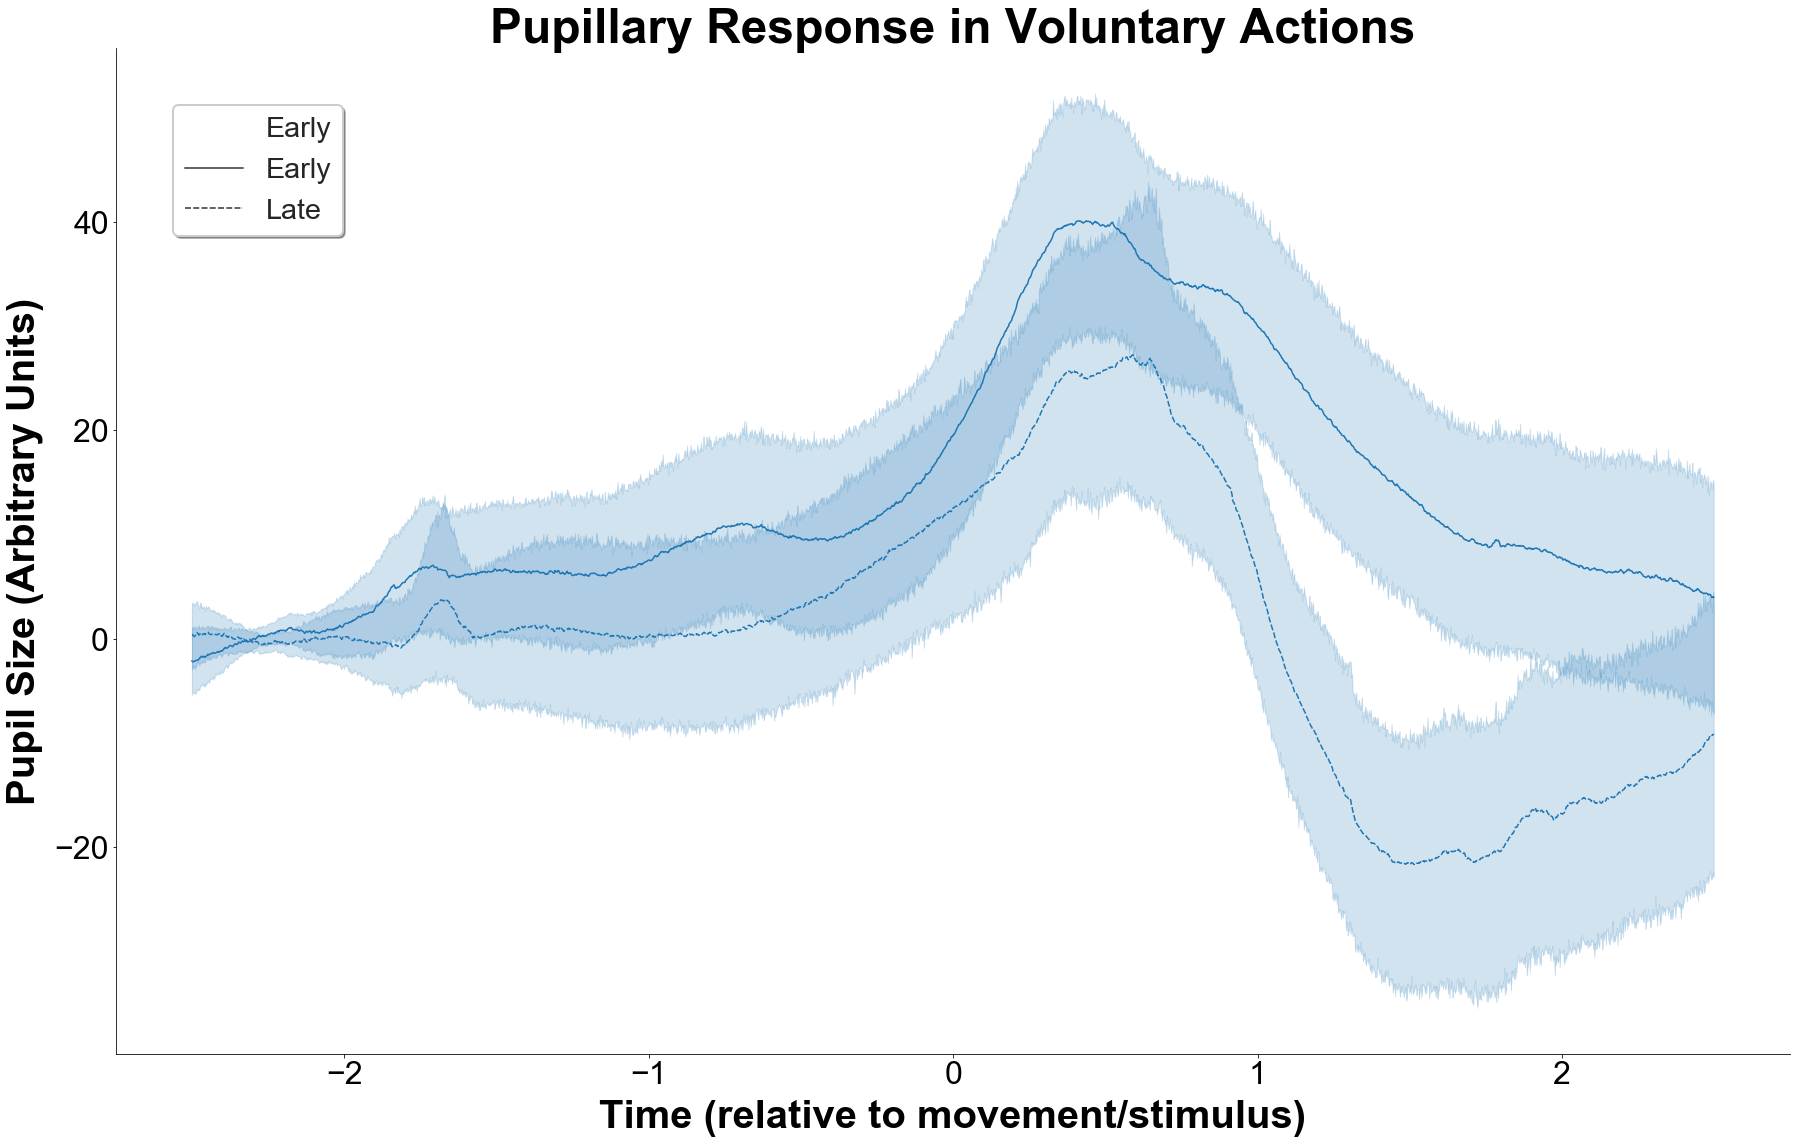

In [16]:
figs,ax=plt.subplots(figsize=(30,18.5))
sns.lineplot(x='Time',y='Pupil',style='Early',data=nr_frames,palette='bright',legend='brief',ax=ax)
sns.set(font_scale = 4)
sns.set_context("poster")
sns.set_style("white")
sns.despine()
ax.tick_params(labelsize=32)
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement/stimulus)',fontsize=40,fontweight='bold',labelpad=10)
ax.set_title('Pupillary Response in Voluntary Actions',fontsize=48,fontweight='bold',loc='center')
ax.legend(loc='upper left',shadow=True,borderaxespad=2,fontsize='large',markerscale=2)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})

plt.savefig('NR_EarlyLate.png',bbox_inches='tight')

In [3]:
### Averaging each subject and then grand-averaging

sub_ids = ['22201','22202','22203','22204','22205','22206']


long_path = 'E:\\Admin\\Research\\Eye Decide\\Longform\\'
short_path = 'E:\\Admin\\Research\\Eye Decide\\Shortform\\'

frames = []

for sub in sub_ids:
    df = pd.read_csv(short_path+sub+'_baselined_ifix.csv')
    df['Participant'] = str(sub)
    frames.append(df)

shortdata = pd.concat(frames)
del shortdata['Unnamed: 0']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [4]:
shortdata.iloc[:,0:45].mean(axis=1)

0        1.664490
1        1.597823
2        1.431156
3        1.397823
4        1.331156
5        1.531156
6        1.531156
7        1.631156
8        1.797823
9        1.731156
10       1.664490
11       1.664490
12       1.564490
13       1.697823
14       1.664490
15       1.664490
16       1.597823
17       1.697823
18       1.664490
19       1.631156
20       1.597823
21       1.331156
22       1.297823
23       1.497823
24       1.464490
25       1.432326
26       1.387954
27       1.510164
28       1.432288
29       1.354326
           ...   
12470   -5.724267
12471   -5.857600
12472   -5.990933
12473   -6.057600
12474   -6.257600
12475   -6.057600
12476   -6.224267
12477   -6.357600
12478   -6.424267
12479   -6.424267
12480   -6.590933
12481   -6.657600
12482   -6.790933
12483   -6.924267
12484   -6.990933
12485   -7.124267
12486   -7.190933
12487   -7.224267
12488   -6.990933
12489   -6.990933
12490   -7.024267
12491   -7.290933
12492   -7.390933
12493   -7.390933
12494   -7

In [5]:
shortdata['AvgPupil']=shortdata.iloc[:,0:45].mean(axis=1)

In [6]:
shortdata.head()

,0,1,10,11,12,13,14,15,16,17,...,44,5,6,7,8,9,CondType,Participant,Time,AvgPupil
0,8.436,-3.34,5.16,1.356,8.56,-12.716,7.14,5.688,4.828,6.492,...,NaN,-16.088,-3.52,2.708,11.832,3.488,No Report,22201,-2.500,1.664490
1,8.436,-2.34,5.16,0.356,7.56,-12.716,7.14,6.688,3.828,7.492,...,NaN,-16.088,-3.52,1.708,11.832,3.488,No Report,22201,-2.498,1.597823
2,7.436,-1.34,4.16,0.356,7.56,-12.716,8.14,3.688,3.828,7.492,...,NaN,-16.088,-3.52,1.708,11.832,3.488,No Report,22201,-2.496,1.431156
3,6.436,-0.34,4.16,0.356,8.56,-12.716,8.14,0.688,3.828,8.492,...,NaN,-16.088,-3.52,0.708,11.832,3.488,No Report,22201,-2.494,1.397823
4,6.436,0.66,3.16,0.356,9.56,-12.716,8.14,-0.312,3.828,7.492,...,NaN,-16.088,-4.52,-0.292,12.832,3.488,No Report,22201,-2.492,1.331156


In [7]:
mask = shortdata['CondType'].str.match('No Report') | shortdata['CondType'].str.match('S-Time')
short=shortdata[mask].replace({'No Report':'Action','S-Time':'Tone'})
short.rename({'CondType':'Condition'},axis=1,inplace=True)

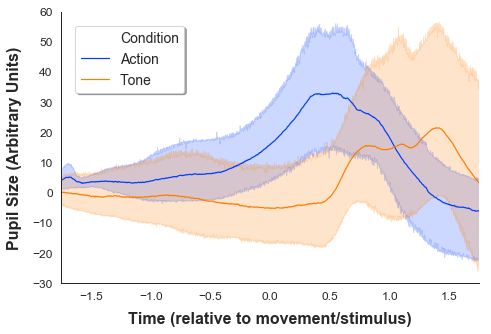

In [15]:
figs,ax=plt.subplots(figsize=(7.5,5))
sns.lineplot(x='Time',y='AvgPupil',hue='Condition',hue_order=['Action','Tone'],data=short,palette='bright',legend='brief',ax=ax)
sns.set(font_scale = 1)
sns.set_context("paper")
sns.set_style("white")
sns.despine()
ax.tick_params(labelsize=12)
ax.set_ylabel('Pupil Size (Arbitrary Units)',fontsize=16,fontweight='bold',labelpad=10)
ax.set_xlabel('Time (relative to movement/stimulus)',fontsize=16,fontweight='bold',labelpad=10)
# ax.set_title('Pupil size before spontaneous actions',fontsize=20,fontweight='bold',loc='center')
ax.legend(loc='upper left',shadow=True,borderaxespad=1,fontsize=14,markerscale=4)
sns.axes_style({"axes.edgecolor":"2","grid.color":"2"})
ax.set_xlim(-1.75,1.75)
ax.set_xticks([-1.5,-1.0,-0.5,0,0.5,1.0,1.5])
ax.set_ylim(-30,60)

plt.savefig('MainFigure_GrandAvgProper2.eps',format='eps',bbox_inches='tight')